In [32]:
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.mask import mask
from shapely.geometry import box
import geopandas as gpd
from fiona.crs import from_epsg
import pycrs
import os
import json
%matplotlib inline

geojson = "./pachama-interview-data/coordinates.geojson"
raster_1 = "./pachama-interview-data/rasters/299_384_10.tif"
raster_1_cut = "./pachama-interview-data/rasters/cut.tif"

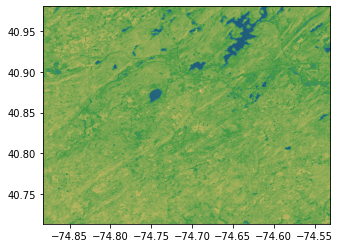

<AxesSubplot:>

In [33]:
# Read the data
data = rasterio.open(raster_1)

# Visualize the NIR band
show((data, 4), cmap='gist_earth')

In [34]:
with open("./pachama-interview-data/coordinates.geojson") as f:
  shapes = [json.load(f)]

out_img, out_transform = mask(dataset=data, shapes=shapes, crop=True)


In [35]:
# Copy the metadata
out_meta = data.meta.copy()
print(out_meta)

{'driver': 'GTiff', 'dtype': 'int32', 'nodata': None, 'width': 1305, 'height': 988, 'count': 222, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.00026949458523585647, 0.0, -74.88284343197603,
       0.0, -0.00026949458523585647, 40.98015511472004)}


In [36]:
# Parse EPSG code
epsg_code = int(data.crs.data['init'][5:])
print(epsg_code)

4326


In [40]:
out_meta.update({"driver": "GTiff",
                 "height": out_img.shape[1],
                 "width": out_img.shape[2],
                 "transform": out_transform,
                 "crs": "WGS84"}
                         )

In [41]:
with rasterio.open(raster_1_cut, "w", **out_meta) as dest:
        dest.write(out_img)

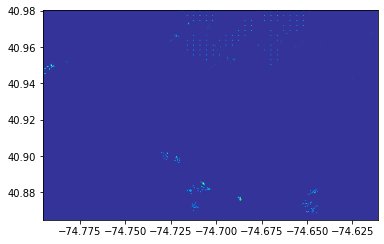

<AxesSubplot:>

In [44]:
# Open the clipped raster file
clipped = rasterio.open(raster_1_cut)

# Visualize
show((clipped, 5), cmap='terrain')

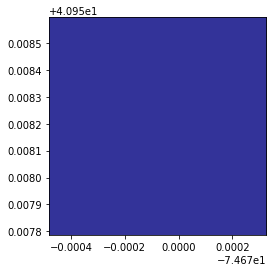

<AxesSubplot:>

In [45]:
# Open the clipped raster file
clipped = rasterio.open("pachama-interview-data/rasters/something.tif")

# Visualize
show((clipped, 5), cmap='terrain')

In [49]:
file = "299_383_10.tif"
allowed = ['tif']
a= file.rpartition(".")[2] in allowed
print(a)

True


In [9]:
import numpy as np
some_list =[-74.79528902505427, 40.946807786177864]
some_array = np.array([1, 2, 3, 4])

some_dict = {}
some_dict[tuple(some_list)] = some_array

In [10]:
some_dict.keys()

dict_keys([(-74.79528902505427, 40.946807786177864)])